# Module 5 Assignment 2 - Company Bankruptcy Prediction (Kaggle)

**Sachin Sharma**

**MSDS-422**

**07/19/2024**

## Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  

## Requirements
Conduct your analysis using a cross-validation design and perform or refine previous Exploratory Data Analysis (EDA). Build at least the following models: Random Forest Classifier, Gradient Boosted Trees, and Extra Trees. Conduct hyperparameter tuning for the following parameters: `n_estimators` (number of trees), `max_features` (maximum features considered for splitting a node), `max_depth` (maximum number of levels in each tree), and splitting criteria (entropy or gini). Compare your models using the F1-Score on a 20% validation set. Generate predictions from your models and submit at least two models to Kaggle.com for evaluation, providing your Kaggle.com username and a screenshot of your scores.

### Libraries to be loaded:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, accuracy_score, mean_squared_error
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, GradientBoostingRegressor
from sklearn.feature_selection import RFE
import xgboost as xgb
pd.set_option('display.max_rows', None)

## Read Data into Pandas DF

In [2]:
train_df = pd.read_csv("data.csv")
train_df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
train_df.shape

(6819, 96)

In [4]:
train_df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## EDA

Get dataframe information:

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

There are no null values.

In [6]:
train_df.isna().sum().sum()

0

All 96 variables are quantitative variables.

In [7]:
# Separate numeric (quantitative) and categorical (nominal) variables
numeric_vars = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_vars = train_df.select_dtypes(include=['object']).columns.tolist()

print("\nNumeric Variables:")
print(len(numeric_vars))

print("\nCategorical Variables:")
print(len(categorical_vars))


Numeric Variables:
96

Categorical Variables:
0


**Let's plot a histogram of the variables.**

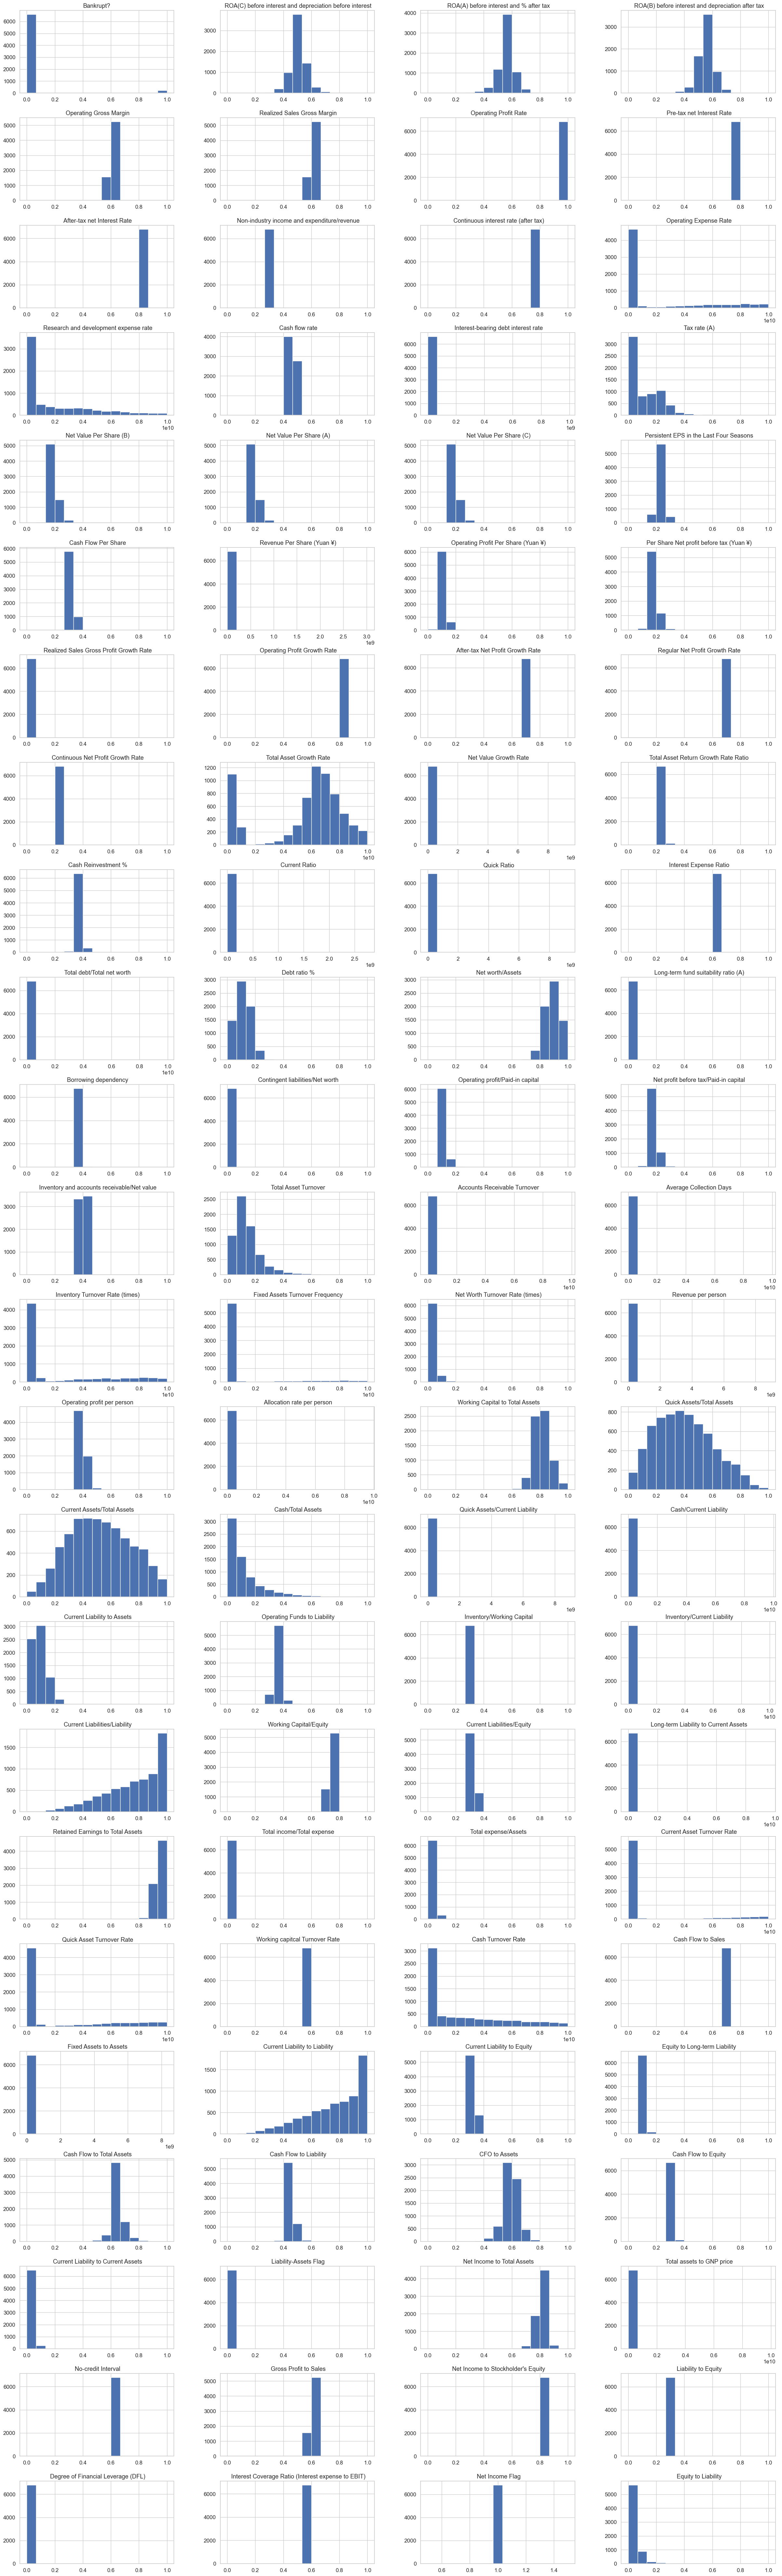

In [8]:
sns.set(style='whitegrid', font_scale=1.1, rc={'figure.figsize': [30, 102]})
train_df[train_df.columns].hist(bins=15, layout=(24, 4));

**Let's create a correlation heatmap.**

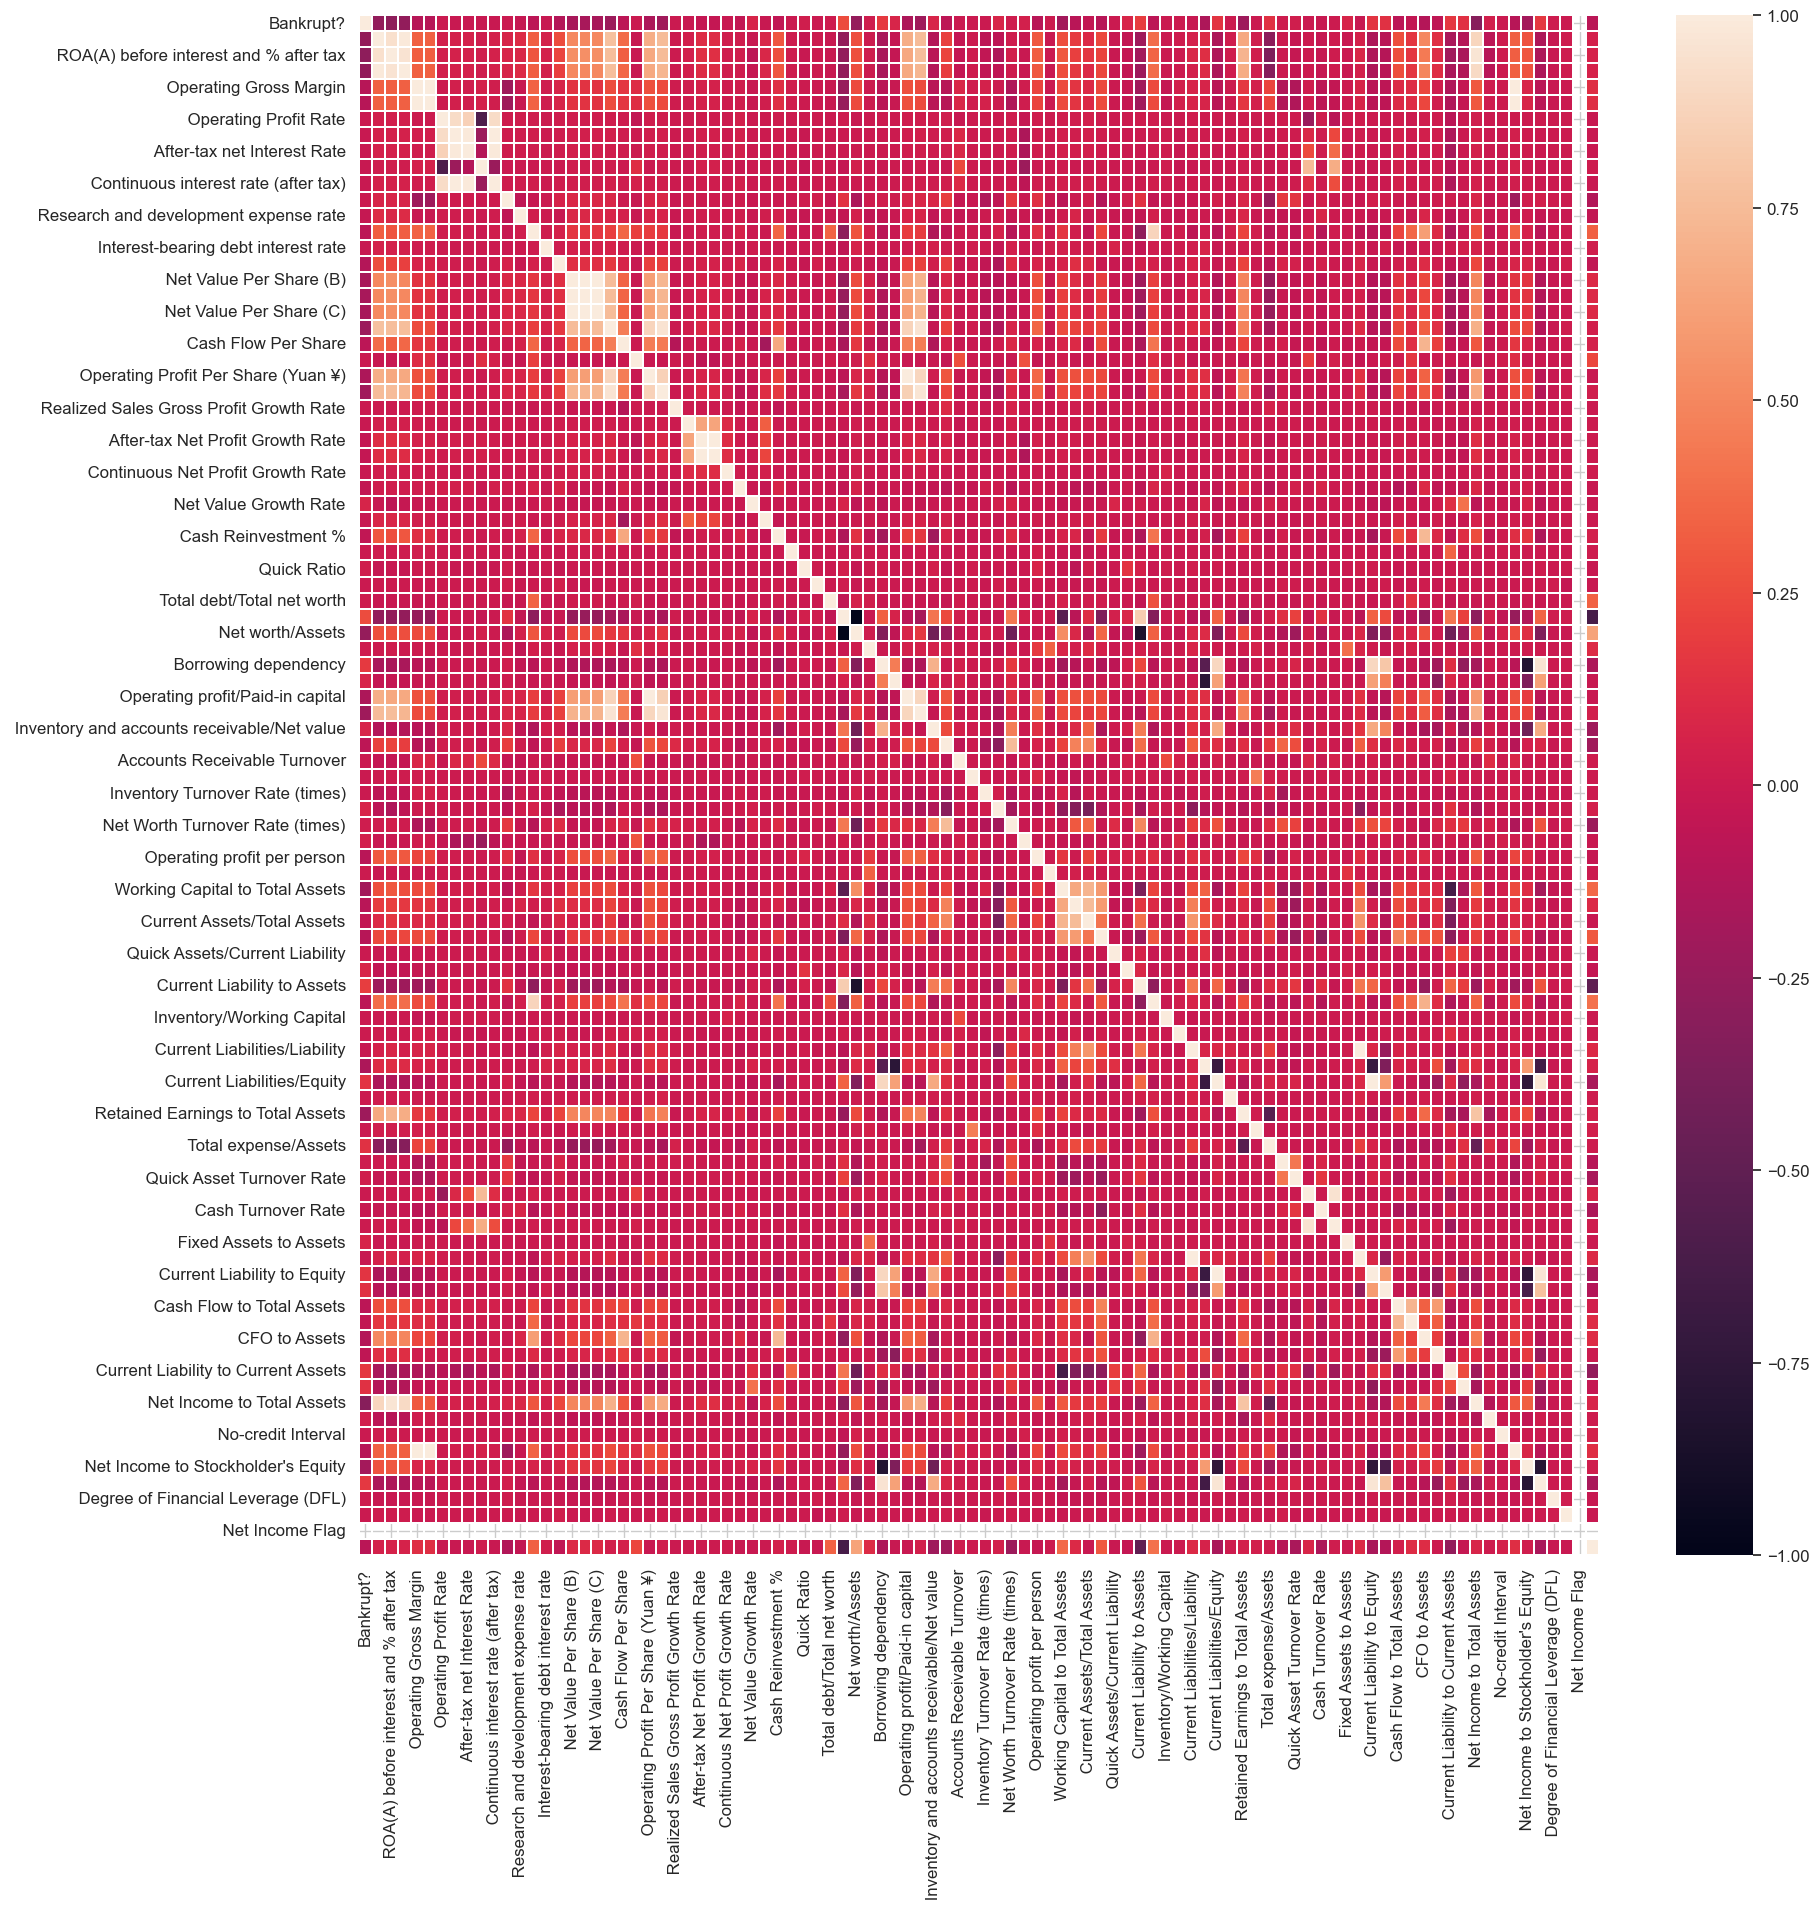

In [9]:
correlation = train_df.corr()
fig, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlation, ax = ax, linewidth = 0.1);

**Just over three percent of the data contain rows listed as 'Bankrupt?' (the dependent variable) = 1.**

In [10]:
total_bankrupt = train_df['Bankrupt?'].sum()
pct_bankrput = total_bankrupt/len(train_df['Bankrupt?'])*100
print('Num bankrupt: %d, %% of sample: %.2f%%' %(total_bankrupt, pct_bankrput))

Num bankrupt: 220, % of sample: 3.23%


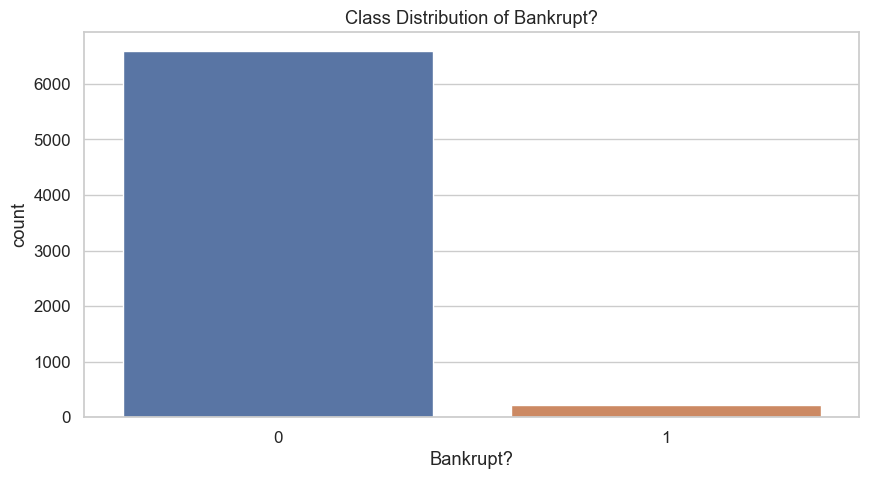

In [11]:
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.countplot(x='Bankrupt?', data=train_df);
plt.title('Class Distribution of Bankrupt?')
plt.show();

In [12]:
print('Financially stable:', round(train_df['Bankrupt?'].value_counts()[0] / len(train_df) * 100,2) ,'%')
print('Financially unstable:', round(train_df['Bankrupt?'].value_counts()[1] / len(train_df) * 100, 2), '%')

Financially stable: 96.77 %
Financially unstable: 3.23 %


The data is highly skewed towards financially stable cases. Training a model on this dataset would result in predictions biased towards financial stability.

To address this, we will balance the dataset before training our model.

In [13]:
train_df_X = train_df.copy()
train_df_y = train_df_X['Bankrupt?']
train_df_X.drop(['Bankrupt?'], axis=1, inplace=True)

In [14]:
train_df_X.shape

(6819, 95)

**Split the train.csv data into 80% training and 20% validation**

In [15]:
X_train,X_val,y_train,y_val = train_test_split(train_df_X,train_df_y,test_size=0.2,random_state=42)

## Oversampling

**We have the data between 'Bankrupt?' and not 'Bankrupt?'. Let's use Smote for oversampling**

In [16]:
oversample = SMOTE(random_state=42)
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [17]:
total_bankrupt = y_train.sum()
pct_bankrput = total_bankrupt/len(train_df_y)*100
print('Num bankrupt: %d, %% of sample: %.2f%%' %(total_bankrupt, pct_bankrput))

Num bankrupt: 5286, % of sample: 77.52%


Resampled class distribution:
 Bankrupt?
0    5286
1    5286
Name: count, dtype: int64


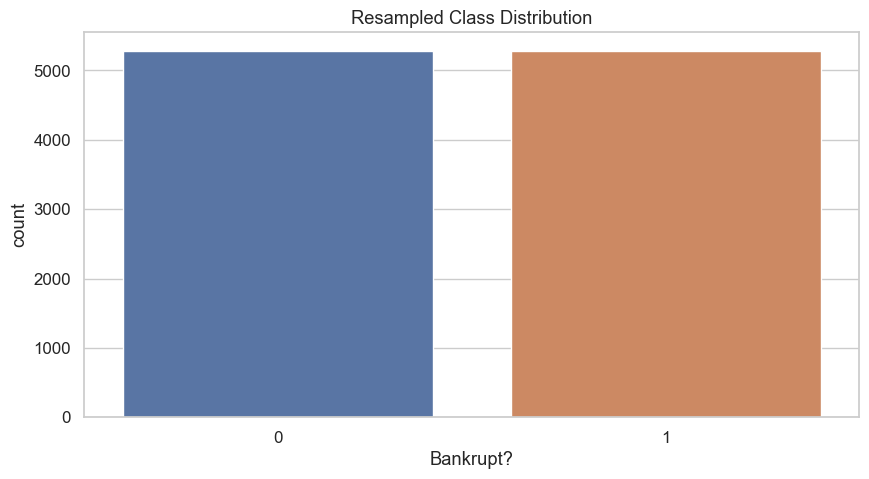

In [18]:
print("Resampled class distribution:\n", y_train.value_counts())
sns.set(style='whitegrid', font_scale=1.1, rc={"figure.figsize": [10, 5]})
sns.countplot(x=y_train)
plt.title('Resampled Class Distribution')
plt.show();

# MODELING

In [19]:
# set up a KFold cross-validation rule
K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# Random Forest Classifier

In [20]:
rfc_grid = {'n_estimators': [200], 'max_leaf_nodes': [16], 'criterion': ['entropy'],'max_features': ['sqrt']}
rfc_cv = GridSearchCV(RandomForestClassifier(random_state=42),cv=kf, param_grid=rfc_grid, scoring='r2')
rfc_results = rfc_cv.fit(X_train, y_train)
print("RFC best score", rfc_results.best_score_)
print("RFC best params", rfc_results.best_params_)

RFC best score 0.7125025858975051
RFC best params {'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 16, 'n_estimators': 200}


In [21]:
rfc_n_estimators = rfc_results.best_params_['n_estimators']
rfc_max_leaf_nodes = rfc_results.best_params_['max_leaf_nodes']
rfc_criterion = rfc_results.best_params_['criterion']
rfc_max_features = rfc_results.best_params_['max_features']

score = cross_val_score(RandomForestClassifier(
            n_estimators=rfc_n_estimators, max_leaf_nodes=rfc_max_leaf_nodes, criterion=rfc_criterion, 
            max_features=rfc_max_features, random_state=42), X_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f " % (score.mean()))

Scores for each fold: [0.92060491 0.9168242  0.9243141  0.92999054 0.92999054 0.93472091
 0.92336802 0.94323557 0.92620624 0.93282876]
Accuracy: 0.9282 


In [22]:
rfc_model = RandomForestClassifier(
            n_estimators=rfc_n_estimators, 
            max_leaf_nodes=rfc_max_leaf_nodes, 
            criterion=rfc_criterion, 
            max_features=rfc_max_features, 
            random_state=42)
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print('confusion matrix:\n',cm)
print('accuracy score = ',accuracy_score(y_val,y_pred))
print("Classification Report:\n",classification_report(y_val,y_pred))

confusion matrix:
 [[1168  145]
 [  10   41]]
accuracy score =  0.8863636363636364
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.22      0.80      0.35        51

    accuracy                           0.89      1364
   macro avg       0.61      0.85      0.64      1364
weighted avg       0.96      0.89      0.92      1364



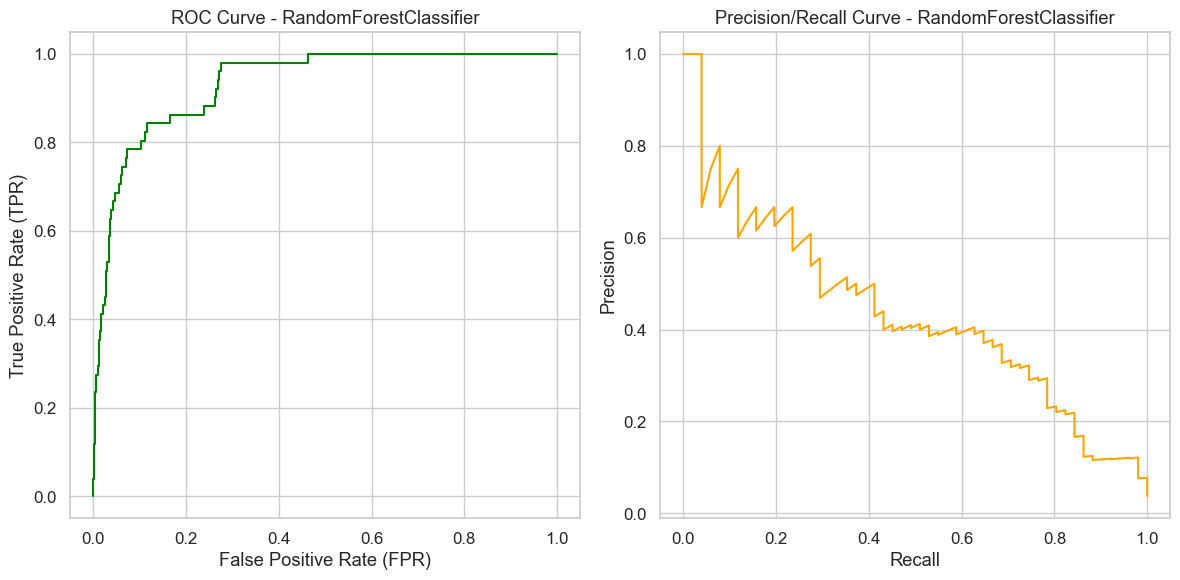

In [23]:
# Define metrics
y_pred_proba = rfc_model.predict_proba(X_val)[::, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve
ax1.plot(fpr, tpr, color="green")
ax1.set_title('ROC Curve - RandomForestClassifier')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_xlabel('False Positive Rate (FPR)')

# Precision-Recall Curve
ax2.plot(recall, precision, color='orange')
ax2.set_title('Precision/Recall Curve - RandomForestClassifier')
ax2.set_ylabel('Precision')
ax2.set_xlabel('Recall')

# Show plot
plt.tight_layout()
plt.show()

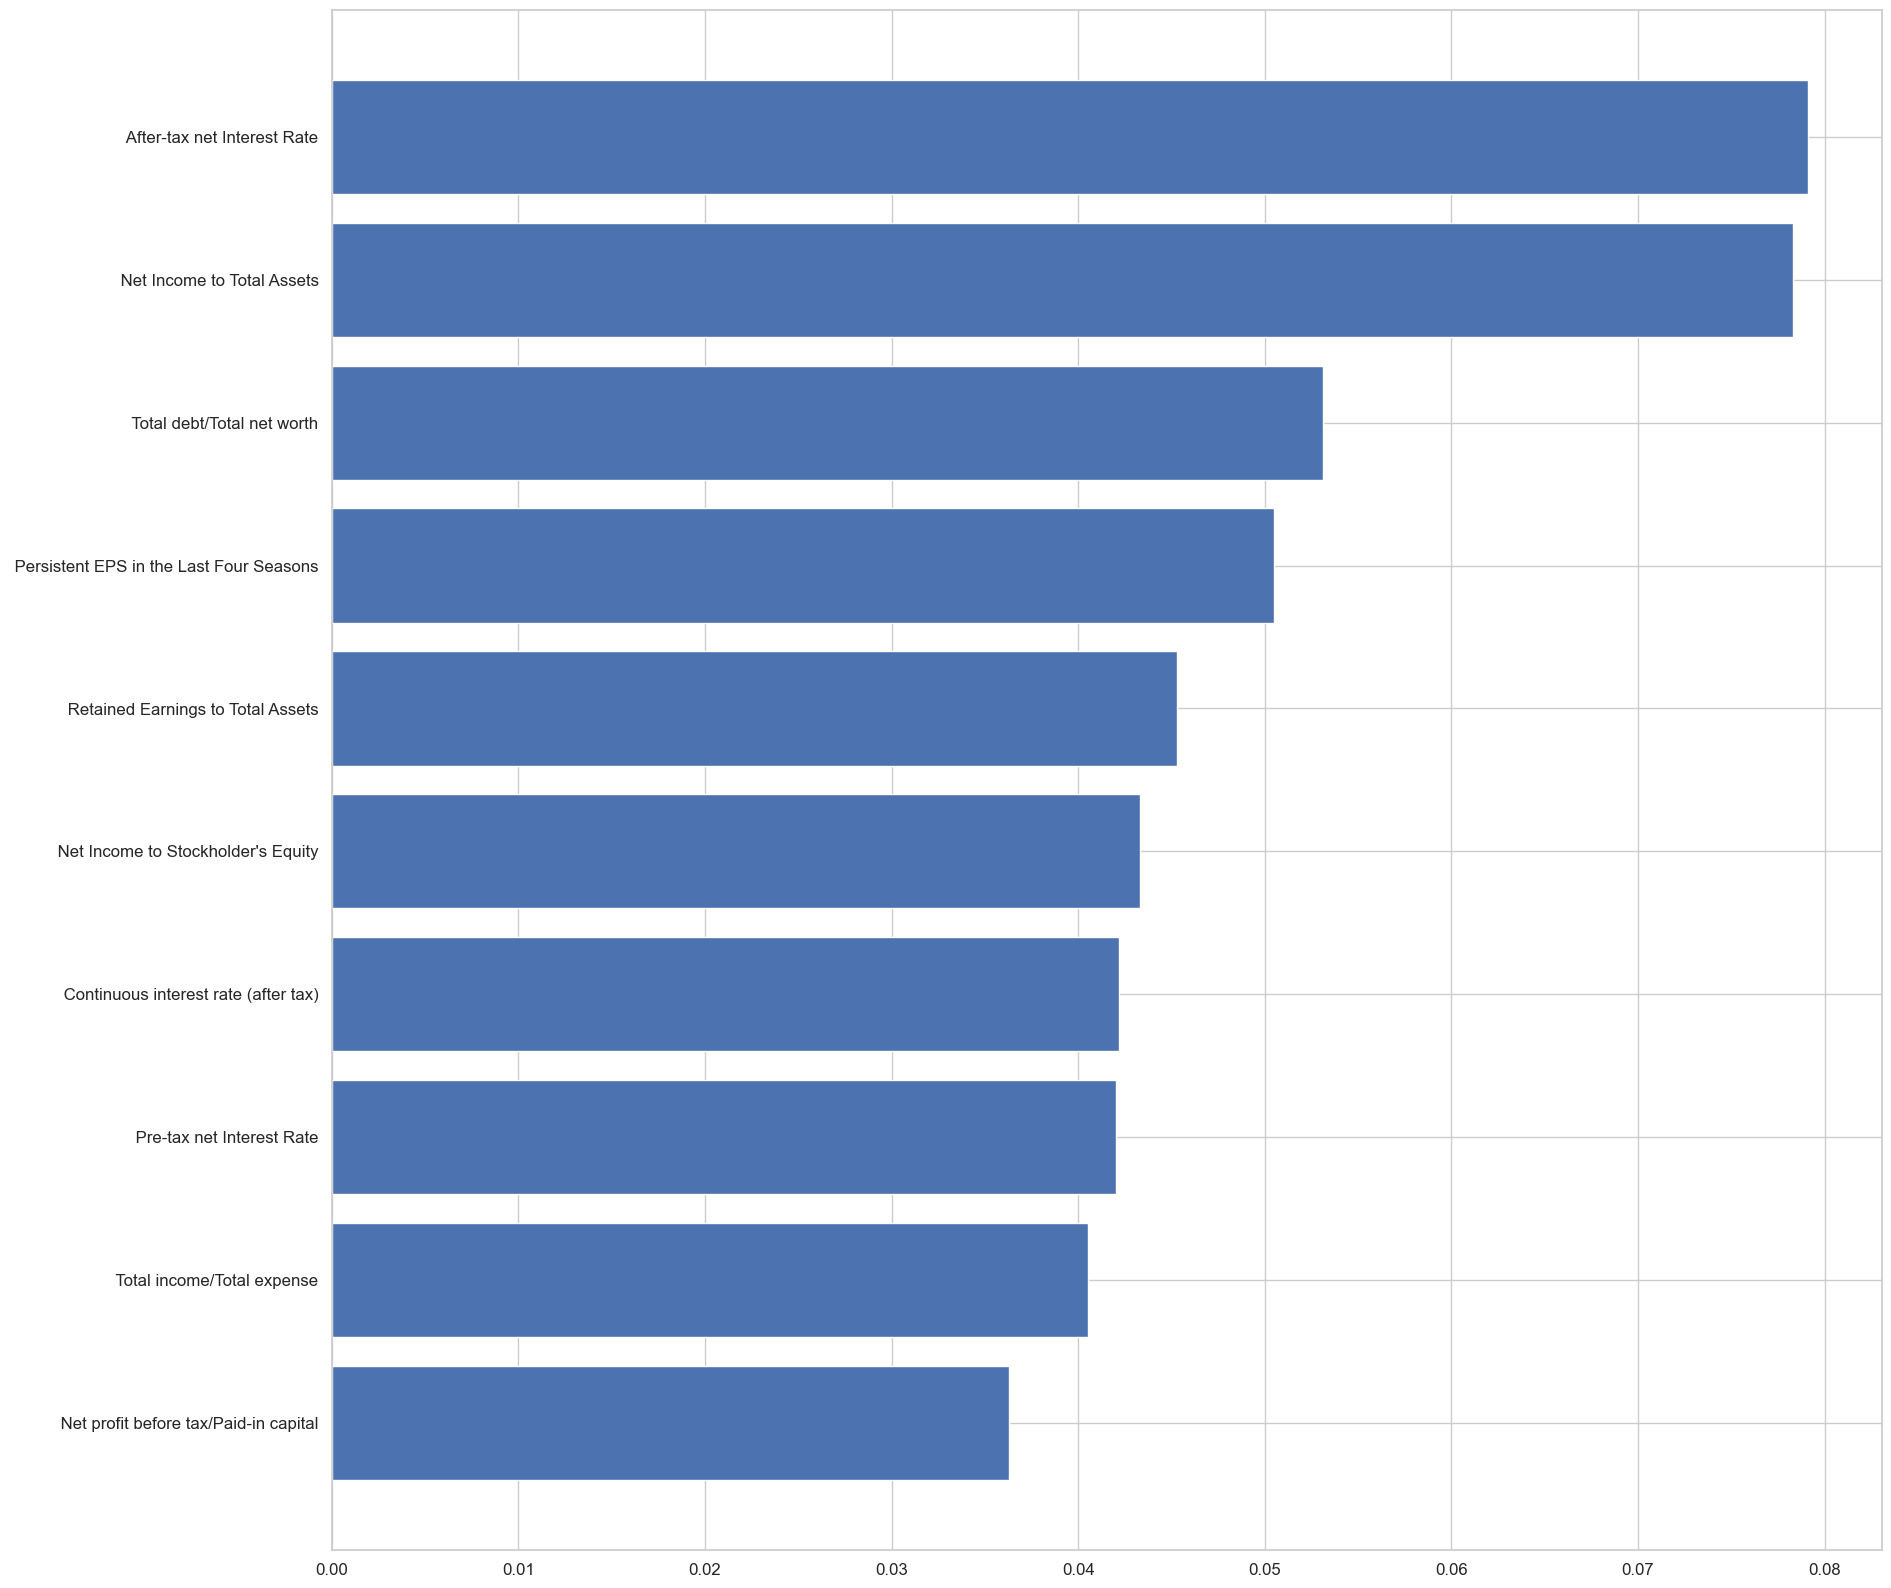

In [24]:
#Top 10 features
f_importances_rfc = pd.Series(np.round(rfc_model.feature_importances_,4),index=X_train.columns).sort_values(ascending=False)[:10]
barx=f_importances_rfc.index
bary=f_importances_rfc.values
plt.figure(figsize = (20, 20))
plt.barh(barx, bary)
plt.gca().invert_yaxis()
plt.show()

'After-tax Net Interest Rate' accounts for nearly 9% of the oversampled dataset's importance when using the Random Forest Classifier, while 'Net Income to Total Assets' contributes approximately 7% to 8%.

# Gradient Boosted Trees

In [25]:
gbc_grid = {'n_estimators': [200], 'max_depth': [10], 'learning_rate': [0.5], 'criterion': ['squared_error'], 'max_features': ['sqrt']}
gbc_cv = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid=gbc_grid, cv=kf, scoring='r2')
gbc_results = gbc_cv.fit(X_train, y_train)
print("GBR best score", gbc_results.best_score_)
print("GBR best params", gbc_results.best_params_)

GBR best score 0.9545422440050235
GBR best params {'criterion': 'squared_error', 'learning_rate': 0.5, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [26]:
gbc_n_estimators = gbc_results.best_params_['n_estimators']
gbc_max_depth = gbc_results.best_params_['max_depth']
gbc_learning_rate = gbc_results.best_params_['learning_rate']
gbc_criterion = gbc_results.best_params_['criterion']
gbc_max_features = gbc_results.best_params_['max_features']

score = cross_val_score(GradientBoostingClassifier( n_estimators=gbc_n_estimators, max_depth=gbc_max_depth, 
            learning_rate=gbc_learning_rate, criterion=gbc_criterion, max_features=gbc_max_features, 
            random_state=42), X_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f " % (score.mean()))

Scores for each fold: [0.98393195 0.98771267 0.98675497 0.98675497 0.98959319 0.98864711
 0.99526963 0.98959319 0.98864711 0.98959319]
Accuracy: 0.9886 


In [27]:
# hypertune n_estimators via early stopping
gbc_model = GradientBoostingClassifier( n_estimators=gbc_n_estimators, max_depth=gbc_max_depth, 
            learning_rate=gbc_learning_rate, criterion=gbc_criterion, max_features=gbc_max_features, random_state=42)
gbc_model.fit(X_train, y_train)
y_pred = gbc_model.predict(X_val)

In [28]:
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbc_model.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1
bst_n_estimators

63

In [29]:
gbc_best = GradientBoostingClassifier( n_estimators=bst_n_estimators, max_depth=gbc_max_depth, learning_rate=gbc_learning_rate, 
            criterion=gbc_criterion, max_features=gbc_max_features, random_state=42)
gbc_best.fit(X_train, y_train)

y_pred = gbc_best.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print('confusion matrix:\n',cm)
print('accuracy score = ',accuracy_score(y_val,y_pred))
print("Classification Report:\n",classification_report(y_val,y_pred))

confusion matrix:
 [[1282   31]
 [  21   30]]
accuracy score =  0.9618768328445748
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.49      0.59      0.54        51

    accuracy                           0.96      1364
   macro avg       0.74      0.78      0.76      1364
weighted avg       0.97      0.96      0.96      1364



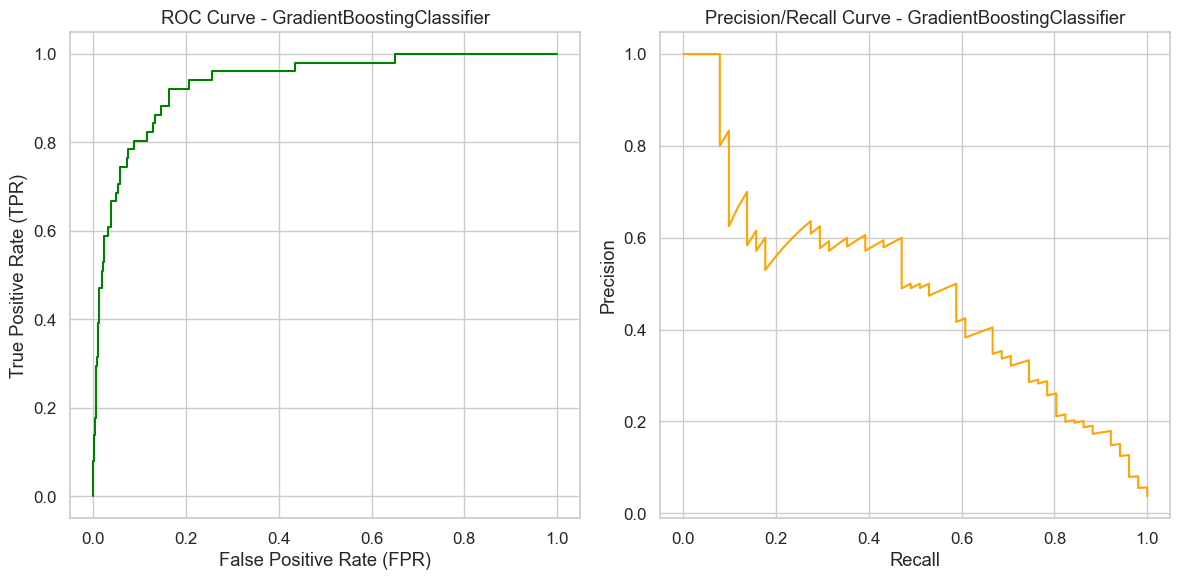

In [30]:
# Define metrics
y_pred_proba = gbc_best.predict_proba(X_val)[::, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve
ax1.plot(fpr, tpr, color="green")
ax1.set_title('ROC Curve - GradientBoostingClassifier')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_xlabel('False Positive Rate (FPR)')

# Precision-Recall Curve
ax2.plot(recall, precision, color='orange')
ax2.set_title('Precision/Recall Curve - GradientBoostingClassifier')
ax2.set_ylabel('Precision')
ax2.set_xlabel('Recall')

# Show plot
plt.tight_layout()
plt.show()

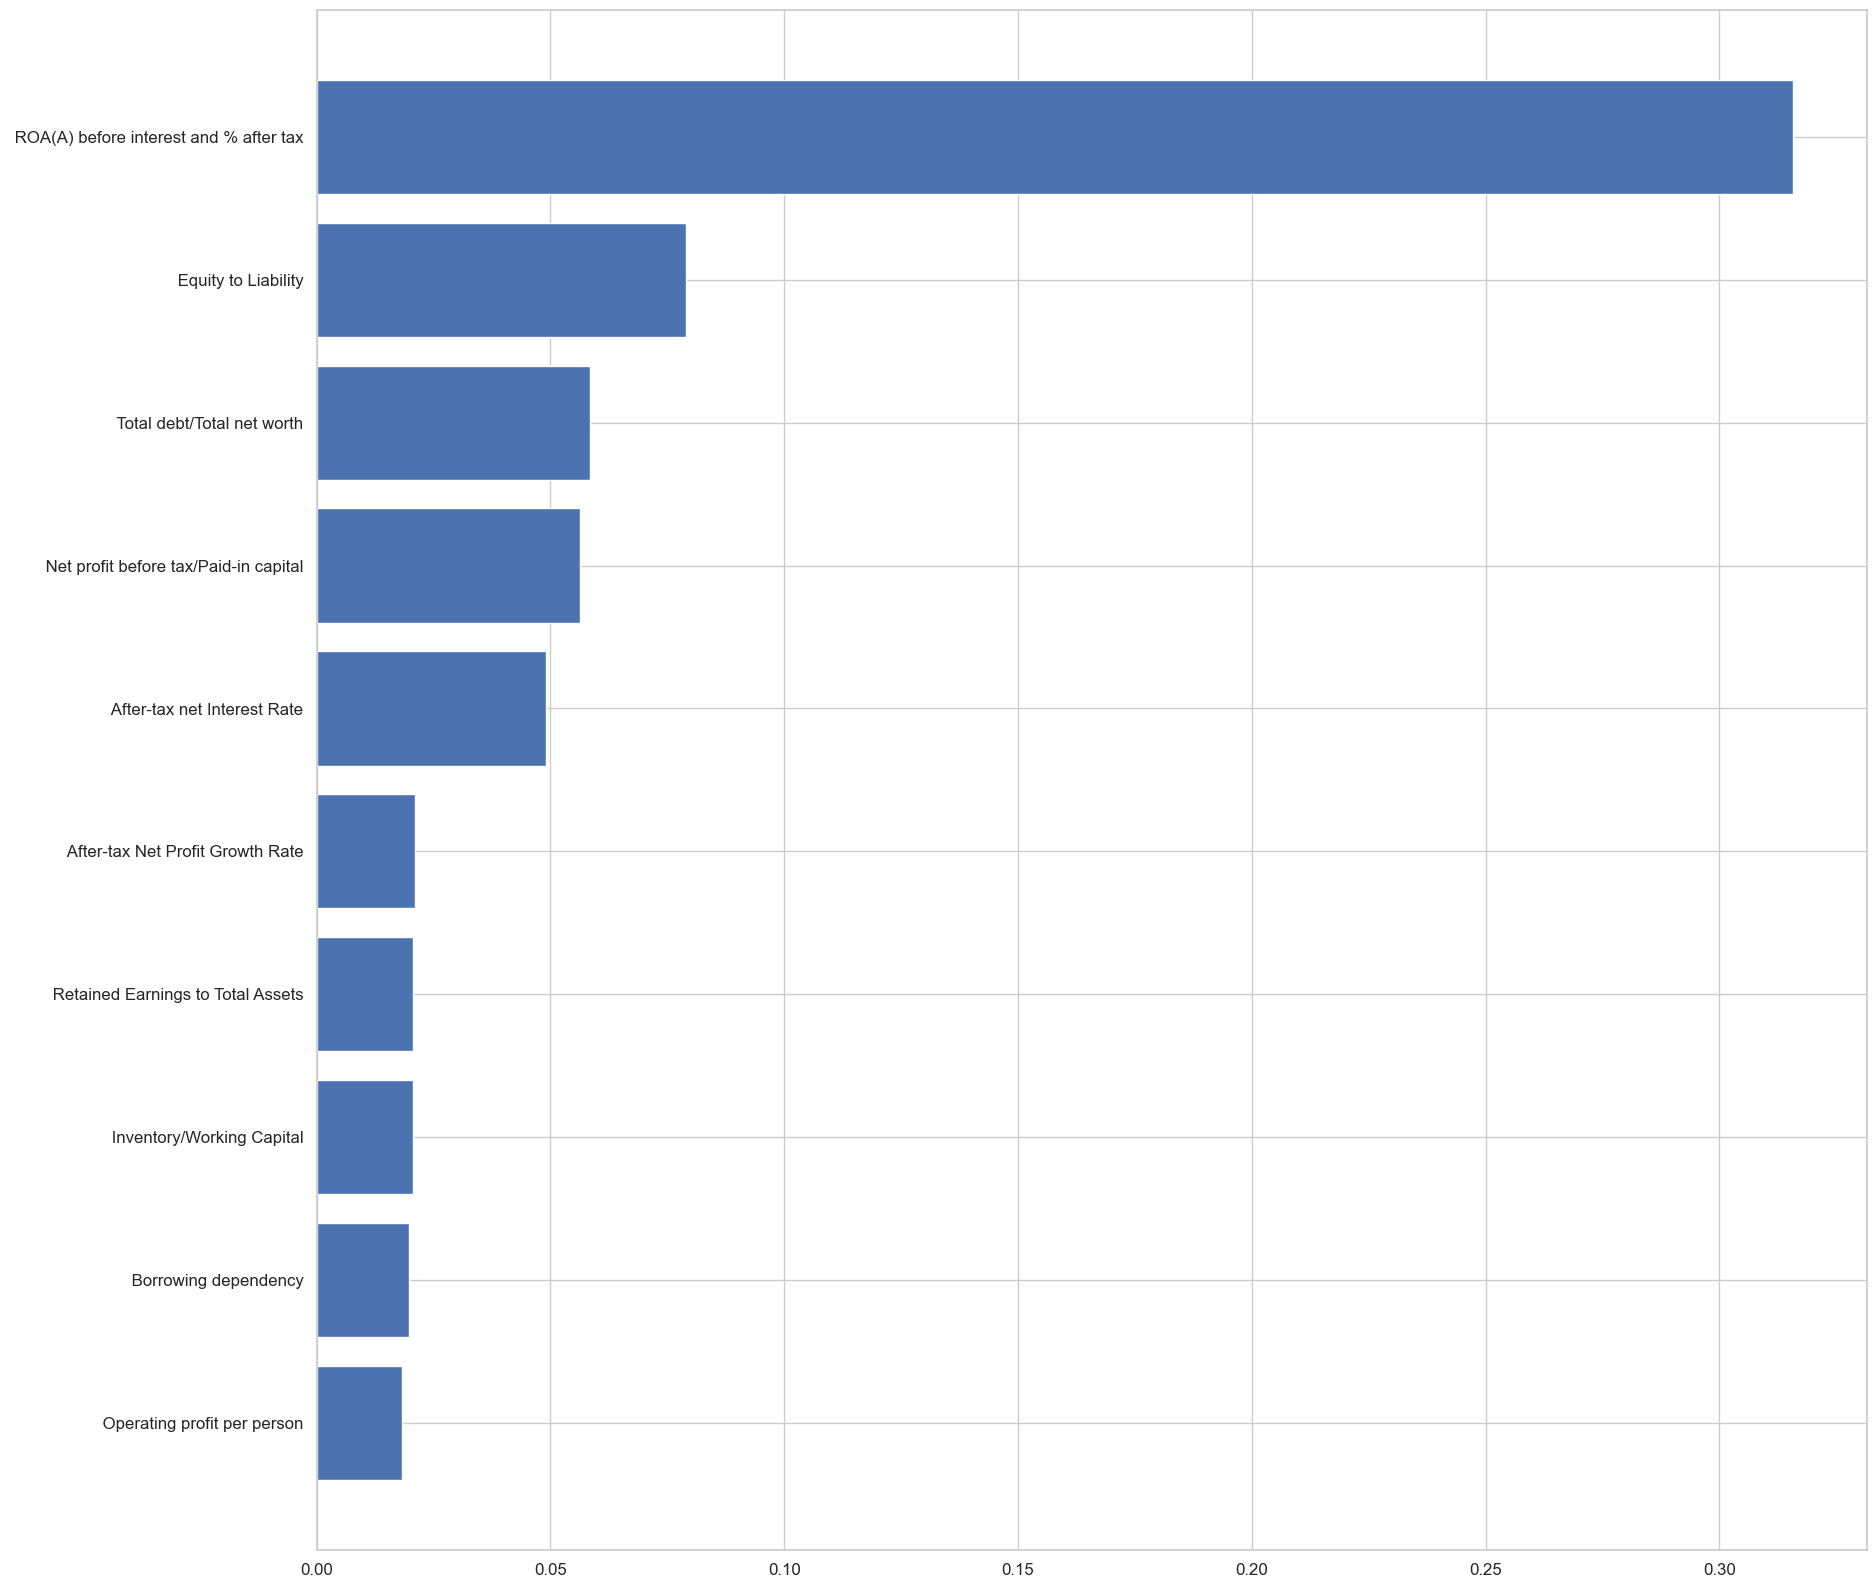

In [31]:
f_importances_gbc = pd.Series(np.round(gbc_best.feature_importances_,4),index=X_train.columns).sort_values(ascending=False)[:10]
barx=f_importances_gbc.index
bary=f_importances_gbc.values
plt.figure(figsize = (20, 20))
plt.barh(barx, bary)
plt.gca().invert_yaxis()
plt.show()

'ROA(A) before interest and % after tax' represents almost one-third of the oversampled dataset when using the Gradient Boost Classifier.

# Gradient Boosted Trees Alternative - Extreme Gradient Boosted Trees

In [32]:
xgb_grid = {'n_estimators': [300], 'max_depth': [10], 'learning_rate': [0.5]}
xgb_cv = GridSearchCV(xgb.XGBClassifier(random_state=42), cv=kf, param_grid=xgb_grid, scoring='r2')
xgb_results = xgb_cv.fit(X_train, y_train)
print("XGB best score", xgb_results.best_score_)
print("XGB best params", xgb_results.best_params_)

XGB best score 0.9526467879287847
XGB best params {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 300}


In [33]:
xgb_n_estimators = xgb_results.best_params_['n_estimators']
xgb_max_depth = xgb_results.best_params_['max_depth']
xgb_learning_rate = xgb_results.best_params_['learning_rate']

score = cross_val_score(xgb.XGBClassifier( n_estimators=xgb_n_estimators, max_depth=xgb_max_depth, 
            learning_rate=xgb_learning_rate, random_state=42), X_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f " % (score.mean()))

Scores for each fold: [0.98582231 0.98582231 0.99053926 0.98486282 0.98675497 0.98959319
 0.99716178 0.98864711 0.98770104 0.98486282]
Accuracy: 0.9882 


In [34]:
xgb_model = xgb.XGBClassifier( n_estimators=xgb_n_estimators, max_depth=xgb_max_depth, learning_rate=xgb_learning_rate, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print('confusion matrix:\n',cm)
print('accuracy score = ',accuracy_score(y_val,y_pred))
print("Classification Report:\n",classification_report(y_val,y_pred))

confusion matrix:
 [[1285   28]
 [  25   26]]
accuracy score =  0.9611436950146628
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1313
           1       0.48      0.51      0.50        51

    accuracy                           0.96      1364
   macro avg       0.73      0.74      0.74      1364
weighted avg       0.96      0.96      0.96      1364



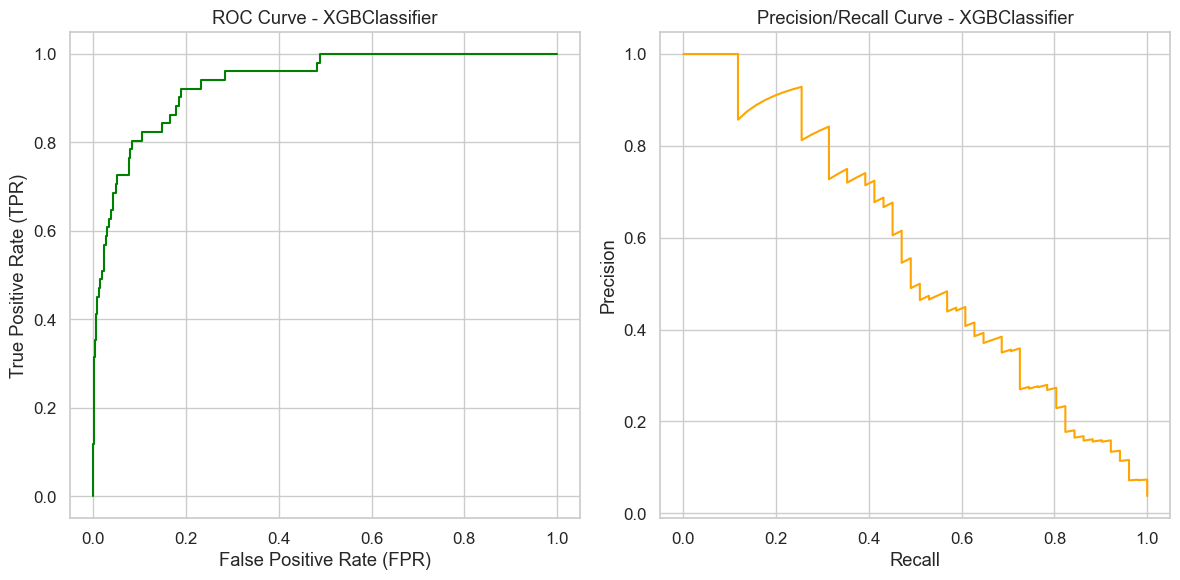

In [35]:
# Define metrics
y_pred_proba = xgb_model.predict_proba(X_val)[::, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve
ax1.plot(fpr, tpr, color="green")
ax1.set_title('ROC Curve - XGBClassifier')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_xlabel('False Positive Rate (FPR)')

# Precision-Recall Curve
ax2.plot(recall, precision, color='orange')
ax2.set_title('Precision/Recall Curve - XGBClassifier')
ax2.set_ylabel('Precision')
ax2.set_xlabel('Recall')

# Show plot
plt.tight_layout()
plt.show()

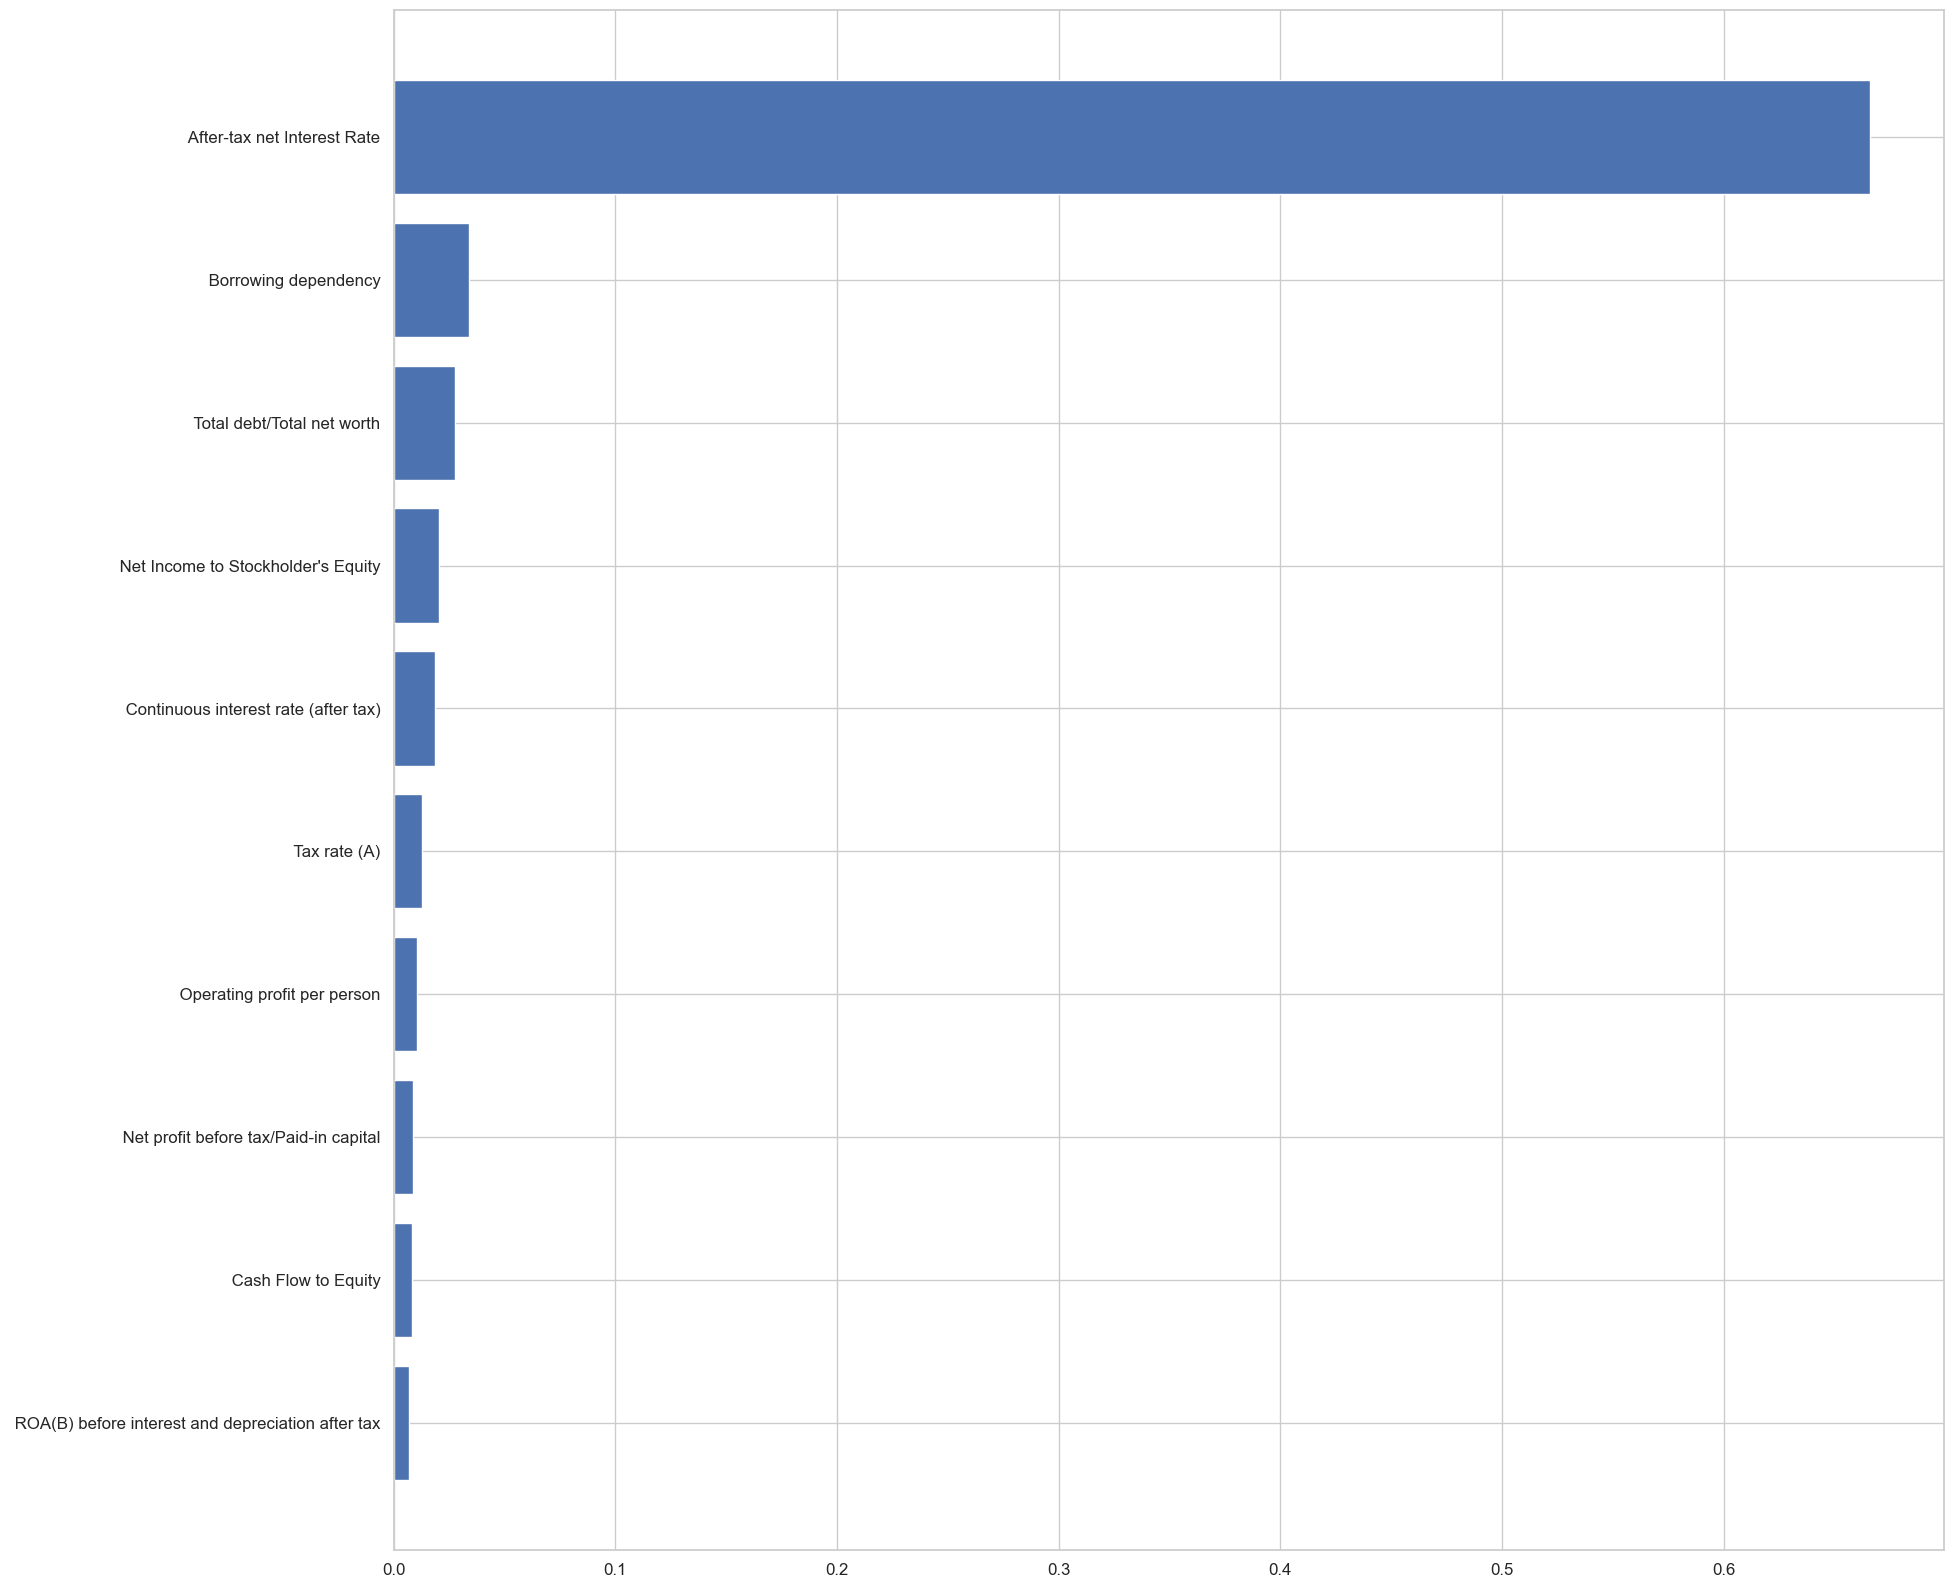

In [36]:
f_importances_xgb = pd.Series(np.round(xgb_model.feature_importances_,4),index=X_train.columns).sort_values(ascending=False)[:10]
barx=f_importances_xgb.index
bary=f_importances_xgb.values
plt.figure(figsize = (20, 20))
plt.barh(barx, bary)
plt.gca().invert_yaxis()
plt.show()

It's quite interesting how the Extreme Gradient Boost Classifier overwhelming uses the After-Tax Net Interest Rate feature over all other features in the oversampled dataset, representing over two-thirds of the dataset alone. It's more 'extreme' than how 'ROA(A) before interest and % after tax' represents almost one-third of the dataset in the traditional Gradient Boost Classifier.

# Extra Trees

In [37]:
xtc_grid = {'n_estimators': [200], 'max_depth': [20], 'criterion': ['entropy'], 'max_features': ['sqrt']}
xtc_cv = GridSearchCV(ExtraTreesClassifier(random_state=42), cv=kf, param_grid=xtc_grid, scoring='r2')
xtc_results = xtc_cv.fit(X_train, y_train)
print("XTC best score", xtc_results.best_score_)
print("XTC best params", xtc_results.best_params_)

XTC best score 0.9113651260825246
XTC best params {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 200}


In [38]:
xtc_n_estimators = xtc_results.best_params_['n_estimators']
xtc_max_depth = xtc_results.best_params_['max_depth']
xtc_criterion = xtc_results.best_params_['criterion']
xtc_max_features = xtc_results.best_params_['max_features']

score = cross_val_score(ExtraTreesClassifier(n_estimators=xtc_n_estimators, max_depth=xtc_max_depth, criterion=xtc_criterion, 
            max_features=xtc_max_features, random_state=42), X_train, y_train, cv=kf)
print(f'Scores for each fold: {score}')
print("Accuracy: %0.4f " % (score.mean()))

Scores for each fold: [0.97164461 0.97637051 0.97350993 0.9820246  0.97729423 0.97540208
 0.9820246  0.98770104 0.97634816 0.97634816]
Accuracy: 0.9779 


In [39]:
xtc_model = ExtraTreesClassifier(n_estimators=xtc_n_estimators, max_depth=xtc_max_depth, criterion=xtc_criterion,
            max_features=xtc_max_features,random_state=42)
xtc_model.fit(X_train, y_train)
y_pred = xtc_model.predict(X_val)
cm = confusion_matrix(y_val,y_pred)
print('confusion matrix:\n',cm)
print('accuracy score = ',accuracy_score(y_val,y_pred))
print("Classification Report:\n",classification_report(y_val,y_pred))

confusion matrix:
 [[1248   65]
 [  16   35]]
accuracy score =  0.9406158357771262
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1313
           1       0.35      0.69      0.46        51

    accuracy                           0.94      1364
   macro avg       0.67      0.82      0.72      1364
weighted avg       0.96      0.94      0.95      1364



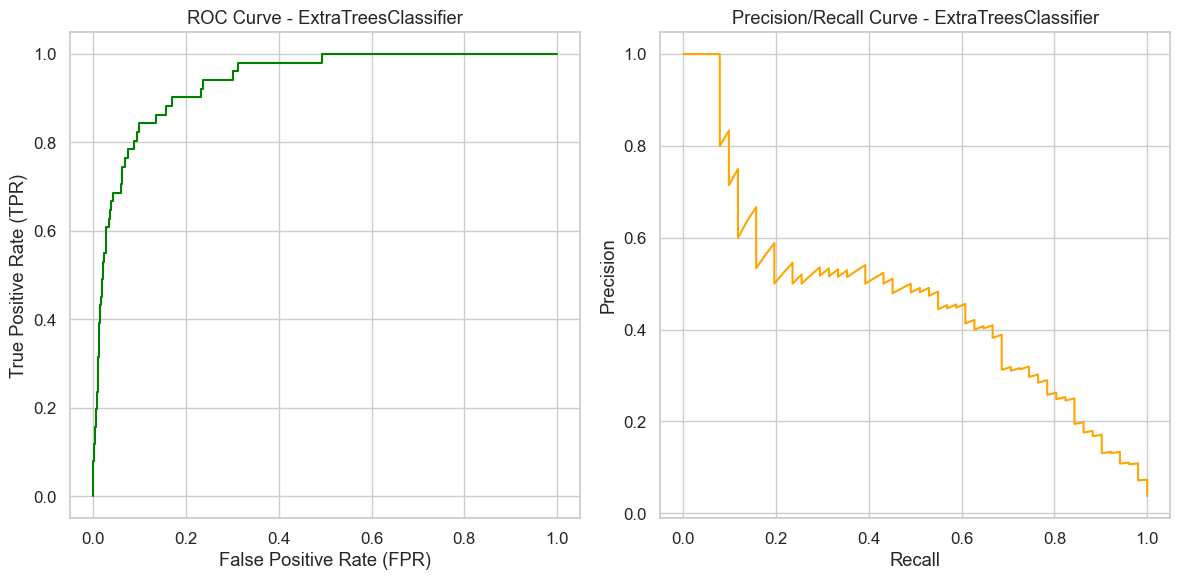

In [40]:
# Define metrics
y_pred_proba = xtc_model.predict_proba(X_val)[::, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
precision, recall, _ = precision_recall_curve(y_val, y_pred_proba)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve
ax1.plot(fpr, tpr, color="green")
ax1.set_title('ROC Curve - ExtraTreesClassifier')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_xlabel('False Positive Rate (FPR)')

# Precision-Recall Curve
ax2.plot(recall, precision, color='orange')
ax2.set_title('Precision/Recall Curve - ExtraTreesClassifier')
ax2.set_ylabel('Precision')
ax2.set_xlabel('Recall')

# Show plot
plt.tight_layout()
plt.show()

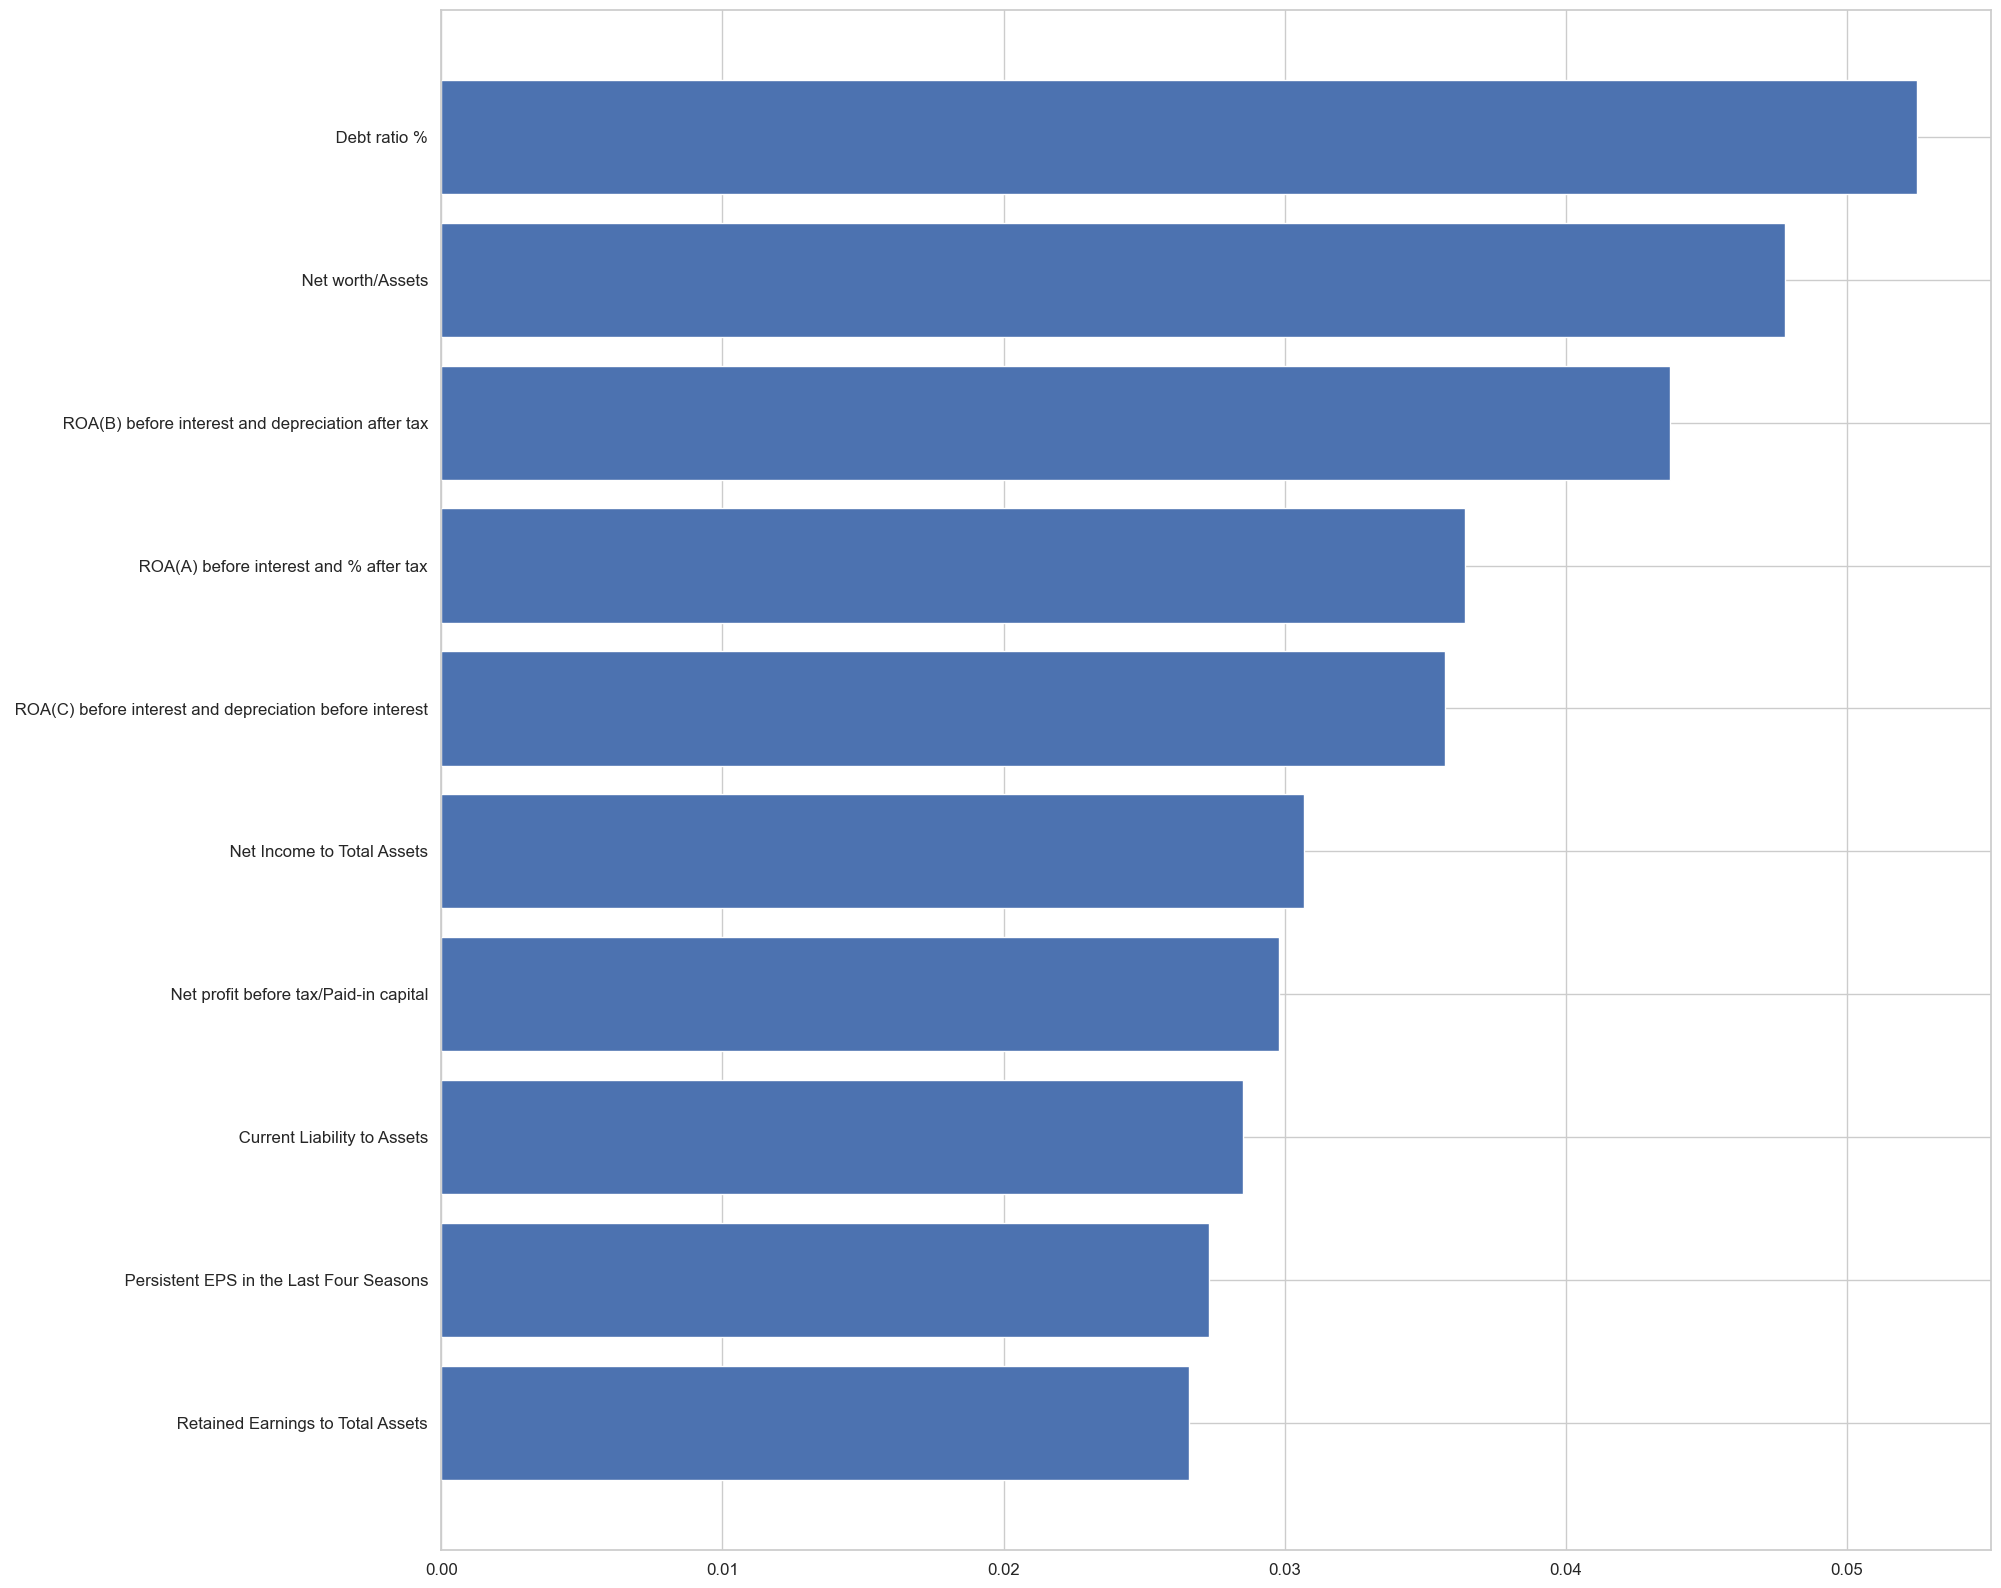

In [41]:
f_importances_xtc = pd.Series(np.round(xtc_model.feature_importances_,4),index=X_train.columns).sort_values(ascending=False)[:10]
barx=f_importances_xtc.index
bary=f_importances_xtc.values
plt.figure(figsize = (20, 20))
plt.barh(barx, bary)
plt.gca().invert_yaxis()
plt.show()

The Extra Trees model does not have a single feature overwhelmingly dominating the dataset. However, the top 15 features collectively represent almost 45% of the oversampled dataset's importance.

### Feature Selection

In [42]:
feature_selection = []
for i in range (0,10):
    feature_selection.append(f_importances_rfc.index[i])
feature_selection

[' After-tax net Interest Rate',
 ' Net Income to Total Assets',
 ' Total debt/Total net worth',
 ' Persistent EPS in the Last Four Seasons',
 ' Retained Earnings to Total Assets',
 " Net Income to Stockholder's Equity",
 ' Continuous interest rate (after tax)',
 ' Pre-tax net Interest Rate',
 ' Total income/Total expense',
 ' Net profit before tax/Paid-in capital']

In [43]:
X_train_fs = X_train[feature_selection]
X_val_fs = X_val[feature_selection]

In [44]:
scaler = StandardScaler().fit(X_train_fs)
X_train_fs_scaled = pd.DataFrame(scaler.transform(X_train_fs), index=X_train_fs.index, columns=X_train_fs.columns)
X_val_fs_scaled = pd.DataFrame(scaler.transform(X_val_fs), index=X_val_fs.index, columns=X_val_fs.columns)

# Support Vector Machine

In [45]:
svc = SVC(kernel='linear', gamma=0.01, C=2, probability=True, random_state=42)
svc.fit(X_train_fs_scaled,y_train)

#getting confusion matrix
y_pred = svc.predict(X_val_fs_scaled)
cm = confusion_matrix(y_val,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
print('accuracy score = ',accuracy_score(y_val,y_pred))
print("Classification Report:\n",classification_report(y_val,y_pred))

confusion matrix:
 [[1101  212]
 [  10   41]]
accuracy score =  0.8372434017595308
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      1313
           1       0.16      0.80      0.27        51

    accuracy                           0.84      1364
   macro avg       0.58      0.82      0.59      1364
weighted avg       0.96      0.84      0.88      1364



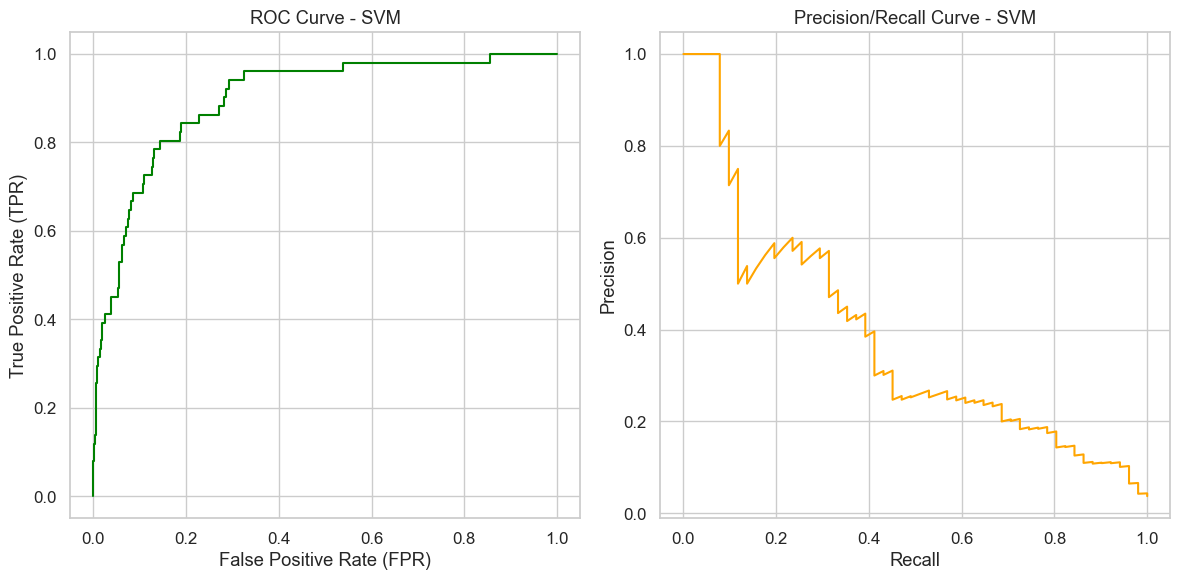

In [46]:
# Define metrics
y_pred = svc.predict_proba(X_val_fs_scaled)[::, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred)
precision, recall, _ = precision_recall_curve(y_val, y_pred)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve
ax1.plot(fpr, tpr, color="green")
ax1.set_title('ROC Curve - SVM')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_xlabel('False Positive Rate (FPR)')

# Precision-Recall Curve
ax2.plot(recall, precision, color='orange')
ax2.set_title('Precision/Recall Curve - SVM')
ax2.set_ylabel('Precision')
ax2.set_xlabel('Recall')

# Show plot
plt.tight_layout()
plt.show()

# Logistic Regression

In [47]:
#training model
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train_fs_scaled,y_train)

#getting confusion matrix
y_pred = lr.predict(X_val_fs_scaled)
cm = confusion_matrix(y_val,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
lra = accuracy_score(y_val,y_pred)
print('accuracy score = ',lra)
print("Classification Report:\n",classification_report(y_val,y_pred))

confusion matrix:
 [[1106  207]
 [  10   41]]
accuracy score =  0.8409090909090909
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91      1313
           1       0.17      0.80      0.27        51

    accuracy                           0.84      1364
   macro avg       0.58      0.82      0.59      1364
weighted avg       0.96      0.84      0.89      1364



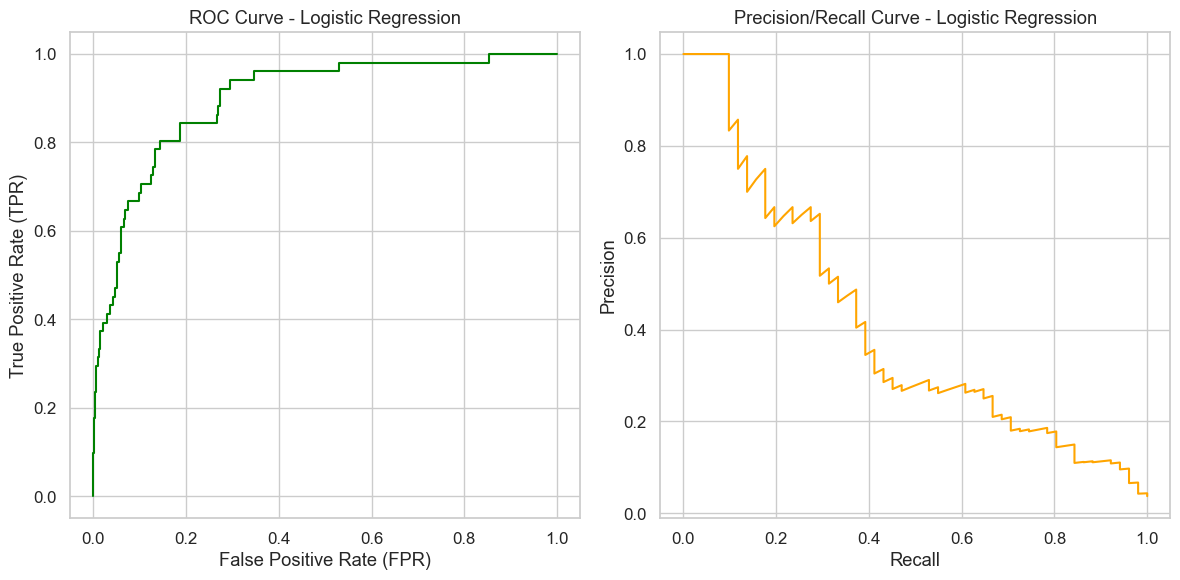

In [48]:
# Define metrics
y_pred = lr.predict_proba(X_val_fs_scaled)[::, 1]
fpr, tpr, _ = roc_curve(y_val, y_pred)
precision, recall, _ = precision_recall_curve(y_val, y_pred)

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# ROC Curve
ax1.plot(fpr, tpr, color="green")
ax1.set_title('ROC Curve - Logistic Regression')
ax1.set_ylabel('True Positive Rate (TPR)')
ax1.set_xlabel('False Positive Rate (FPR)')

# Precision-Recall Curve
ax2.plot(recall, precision, color='orange')
ax2.set_title('Precision/Recall Curve - Logistic Regression')
ax2.set_ylabel('Precision')
ax2.set_xlabel('Recall')

# Show plot
plt.tight_layout()
plt.show()

# Naive Bayes

In [49]:
#training model
nb = GaussianNB()
nb.fit(X_train_fs_scaled,y_train)

#getting confusion matrix
y_pred = nb.predict(X_val_fs_scaled)
cm = confusion_matrix(y_val,y_pred)
print('confusion matrix:\n',cm)

#checking accuracy
nba = accuracy_score(y_val,y_pred)
print('accuracy score = ',accuracy_score(y_val,y_pred))
print("Classification Report:\n",classification_report(y_val,y_pred))

confusion matrix:
 [[538 775]
 [  4  47]]
accuracy score =  0.42888563049853373
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.41      0.58      1313
           1       0.06      0.92      0.11        51

    accuracy                           0.43      1364
   macro avg       0.52      0.67      0.34      1364
weighted avg       0.96      0.43      0.56      1364



unscaled data was used in Naive bayes.

## CONCLUSION

### Management/Research Question

**In layman’s terms, what is the management/research question of interest, and why would anyone care?**

The primary question of interest is: "Can we accurately predict whether a company will go bankrupt based on its financial data?" This question is crucial for various stakeholders. Loan institutions need to assess the bankruptcy risk of companies to make informed lending decisions. Companies can use the predictions to identify and rectify financial issues, potentially reducing their risk of bankruptcy. Customers, on the other hand, benefit from knowing a company's bankruptcy risk, which helps them decide whether to start or continue business relations with that company.

Using the bankruptcy data from the Taiwan Economic Journal spanning 1999 to 2009, the goal is to predict a company's likelihood of bankruptcy. For loan institutions, this information is crucial to assess the risk before granting substantial loans. Companies can use these predictions to identify and address internal issues to reduce their bankruptcy risk. Customers also benefit by being informed of a company's potential bankruptcy status, aiding in their decision-making about whether to start or continue doing business with the company.

From my observations, both tree-based and non-tree-based models exhibit a nearly strong negative correlation between precision and recall. None of the precision-recall curves indicate a favorable balance where a reasonable recall can achieve a satisfactory precision rate.

When it comes to identifying bankruptcies in the validation dataset, Gradient Boosting and Extreme Gradient Boosting models are more accurate in pinpointing bankruptcy cases. On the other hand, the Random Forest and Extra Trees models tend to favor recall, identifying more true bankruptcy cases at the expense of falsely labeling some non-bankrupt cases. The application of oversampling seems to enhance the performance of models that prioritize precision over recall.